In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# European Railway Network (IT, ... UA)

 The output consists of two files for each country: one for nodes (nodeID,nodeLabel,latitude,longitude,country_name,country_ISO3) and one for edges list (nodeID_from,nodeID_to).

# Read and store data for network nodes

In [2]:
stations = gpd.read_file("RailrdC.shp")

Check if the .shx file exists in the same directory as the RailrdC.shp file. You should have at least these three files:

RailrdC.shp
RailrdC.shx
RailrdC.dbf
If any of these files are missing, you need to obtain a complete set of the shapefile.
### core attributes
ICC = The ISO 3166-1 2-char Country Code defining the country dataset to which the feature is belonging. In case of more than one country, the codes are delimited by # and set in alphabetical order. In case of no country responsible (terra nullius), the ICC code is set to “XX”.
This ICC attribute is added for the handling of the data in a seamless coverage.

### specific attributes
NAMA1 = name in first national language, written in international alphabet
NLN1 = language code (e.s. FRE for French language)

TFC = Trasportation Facility Type 
      ---0 unknown
      ---15 railway station, 
      ---31 joint railway station. A "joint" railway station is simply a station which operates under control of more than one company. 
      ---32 halt. A "halt" is a small stop station. 
      33 marshmalling yard. A "marshalling yard" is "stazione di smistamento" i.e. a place where vagons are put together into trains. 
      ---34 intermodal rail transport terminal. An "intermodal rail terminal" is a terminal used for mixed-transport of freight or passengers. 

TUC = Transportation Use Category
      0 unknown
      25 cargo/freight
      26 passenger
      45 general
      997 unpopulated

RStationID = unique identifier of the station

In [3]:
type(stations)
stations.head()

,FCsubtype,inspireId,beginLifes,F_CODE,ICC,TFC,NAMN1,NAMN2,NAMA1,NAMA2,NLN1,NLN2,TUC,RStationID,geometry
0,1,_EG.EGM.RailrdC:808df556-1669-47a3-a214-c6d62b...,2018-08-02,AQ125,GE,32,á©áá¥áá,N_A,Chakvi,N_A,GEO,N_A,26,N.GE.RAILRDC.000049,POINT (41.73249 41.73377)
1,1,_EG.EGM.RailrdC:2a0a94e3-5cf7-486d-8d0e-e8acf8...,2018-08-02,AQ125,FR,15,Pornic,N_A,Pornic,N_A,FRE,N_A,26,N.FR.RAILRDC.001982,POINT (-2.09785 47.11453)
2,1,_EG.EGM.RailrdC:3080d8fb-c1fc-4064-b702-f3b20c...,2018-08-02,AQ125,LT,15,Alytus,N_A,Alytus,N_A,LIT,N_A,25,N.LT.RAILRDC.000084,POINT (23.98133 54.39918)
3,1,_EG.EGM.RailrdC:91d05dcd-5a31-408d-a072-3b8dc8...,2018-08-02,AQ125,SK,32,Bielovec,N_A,Bielovec,N_A,SLO,N_A,26,N.SK.RAILRDC.000011,POINT (18.77458 47.99645)
4,1,_EG.EGM.RailrdC:61b8b96a-0de7-4c9e-ab90-4559b2...,2018-08-02,AQ125,SK,32,ÄermeÄ¾,N_A,Cermel,N_A,SLO,N_A,26,N.SK.RAILRDC.000319,POINT (21.22856 48.74974)


## Preliminary geodataframe manipulations

In [4]:
# Columns to extract
columns_to_extract = ['ICC', 'TFC', 'NAMA1', 'RStationID', 'TUC']
# Creating a new GeoDataFrame with the selected columns and the geometry
stations = gpd.GeoDataFrame(stations[columns_to_extract], geometry=stations.geometry)

# Define dictionary for ICC codes and country names correspondence
# Refer to DOCUMENTS/EGM_2019_UserGuide.pdf Annex C 
ICC_labels = {'GE':'Georgia',
            'IT': 'Italy',
            "FR": "France",
            "LT": "Lithuania",
            "SK": "Slovakia",
            "PT": "Portugal",
            "ES": "Spain",
            "EE": "Estonia",
            "RS": "Serbia",
            "HU": "Hungary",
            "IE": "Ireland",
            "PL": "Poland",
            "AT": "Austria",
            "LU": "Luxemburg",
            "CH": "Switzerland",
            "BE": "Belgium",
            "CZ": "Czech Republich",
            "NL": "Netherlands",
            "GR": "Greece",
            "GB": "Great Britain",
            "RO": "Romania",
            "ND": "Northen Ireland",
            "MD": "Moldova",
            "DK": "Denmark",
            "NO": "Norwey",
            "SE": "Sweden",
            "FI": "Finland",
            "LV": "Latvia",
            "DE": "Germany",
            "SI": "Slovenia",
            "HR": "Croatia",
            "BG": "Bulgaria",
            "UA": "Ukraine",
            "MK": "Macedonia"}

# Map country names to a new column of dataframe
stations['Country Name'] = stations['ICC'].map(ICC_labels)


## 2D Scatterplot of Europe Railway Stations

Color distinguishes among cathegories (Use and Facility)

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_3842/1145177529.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_tfc = plt.cm.get_cmap('viridis', len(unique_tfc))
/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_3842/1145177529.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_tuc = plt.cm.get_cmap('viridis', len(unique_tuc))


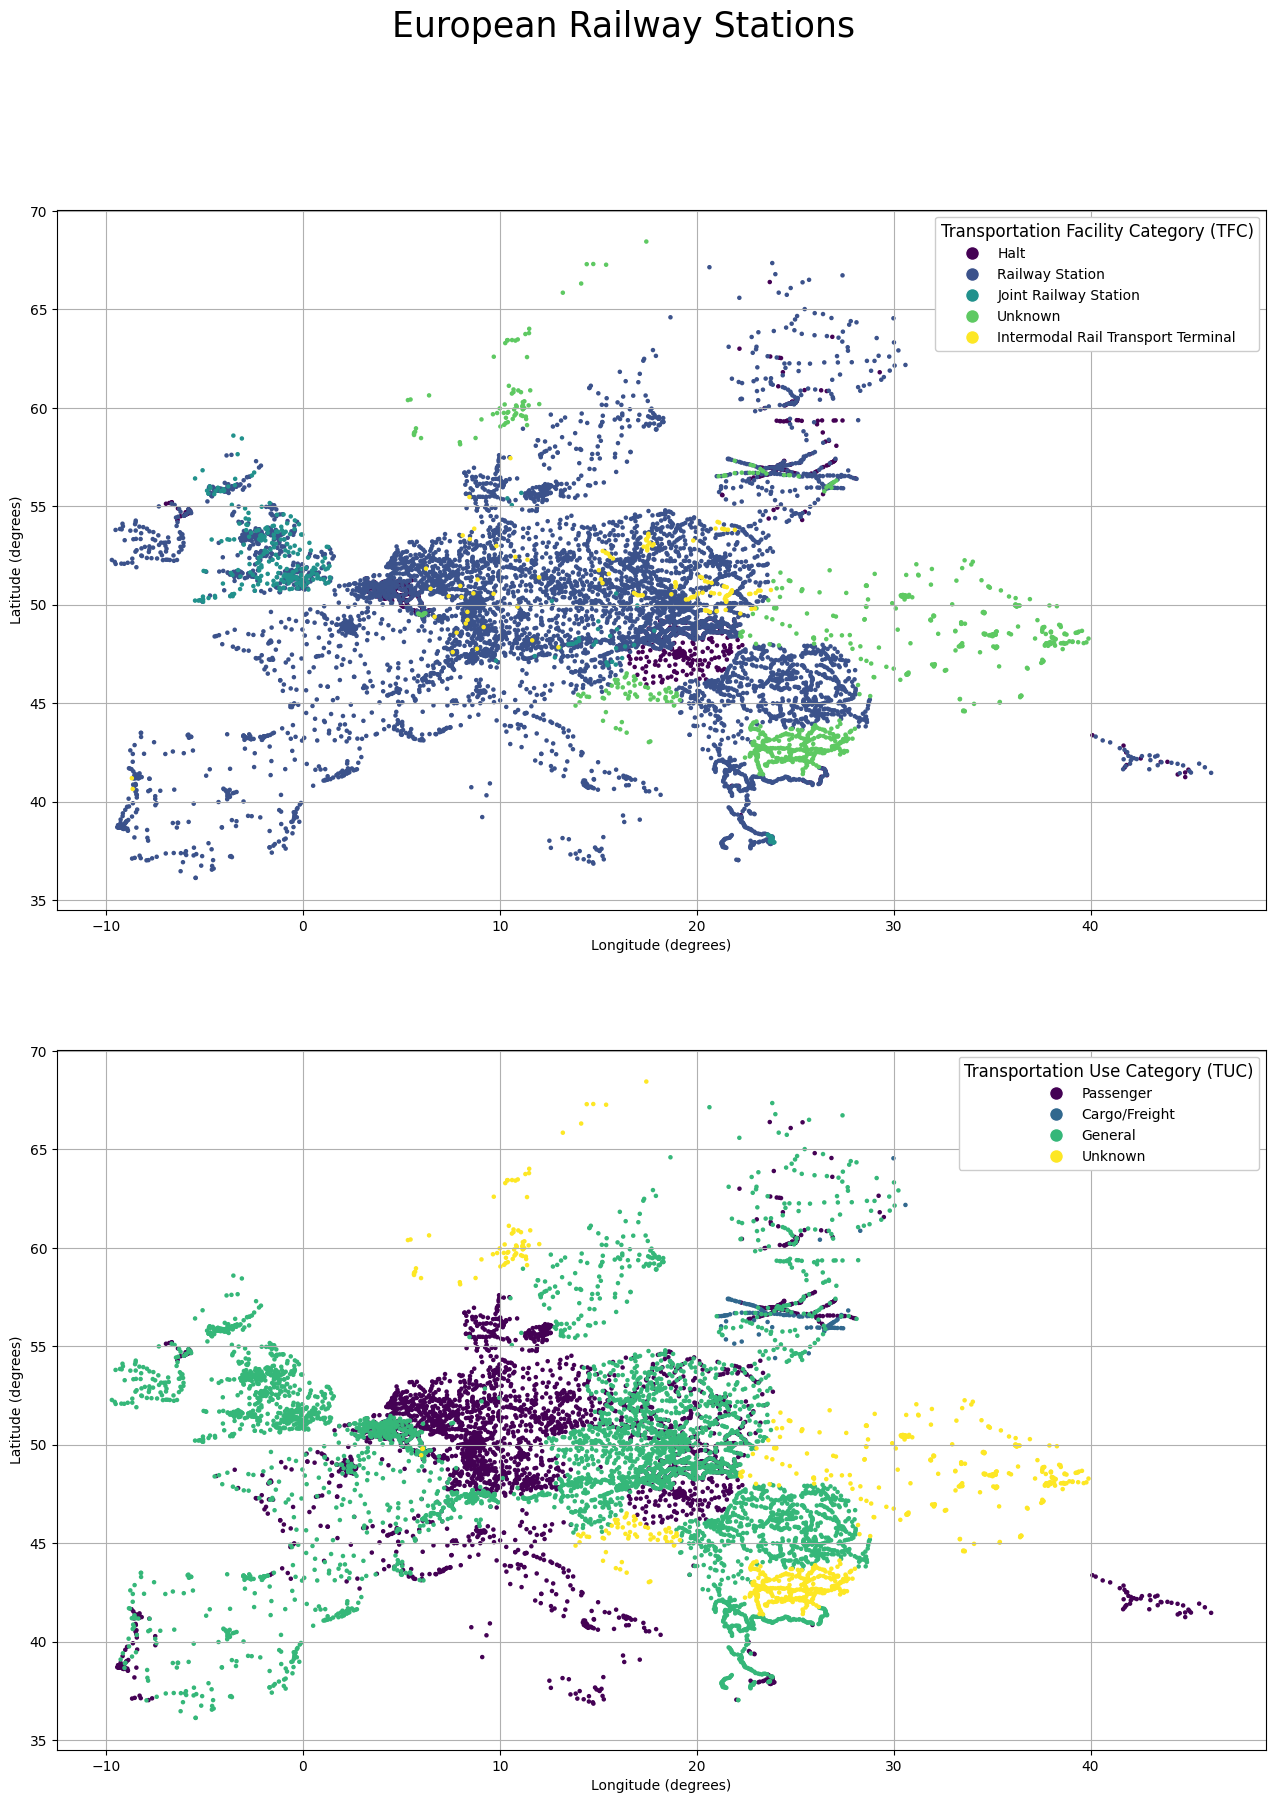

In [5]:
# define geodata frame for plotting
gdf = stations.copy()

# Define the mapping dictionary
tfc_labels = {0: 'Unknown', 15: 'Railway Station', 31: 'Joint Railway Station', 32: 'Halt', 33: "Marshalling Yard", 34: "Intermodal Rail Transport Terminal"}
tuc_labels = {0: 'Unknown', 25: 'Cargo/Freight', 26: 'Passenger', 45: 'General', 997: "Unpopulated"}

# Map the TFC values to their labels and create a new column
gdf['TFC_label'] = gdf['TFC'].map(tfc_labels)
gdf['TUC_label'] = gdf['TUC'].map(tuc_labels)

#Define a color map for TFC
unique_tfc = gdf['TFC'].unique()
colors_tfc = plt.cm.get_cmap('viridis', len(unique_tfc))
color_map_tfc = {tfc: colors_tfc(i) for i, tfc in enumerate(unique_tfc)}
# Apply the color map to the GeoDataFrame
gdf['color_tfc'] = gdf['TFC'].apply(lambda x: color_map_tfc[x])

#Define a color map for TUC
unique_tuc = gdf['TUC'].unique()
colors_tuc = plt.cm.get_cmap('viridis', len(unique_tuc))
color_map_tuc = {j: colors_tuc(i) for i, j in enumerate(unique_tuc)}
# Apply the color map to the GeoDataFrame
gdf['color_tuc'] = gdf['TUC'].apply(lambda x: color_map_tuc[x])

# Plot the GeoDataFrame
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 20))

# TFC plot
for tfc in unique_tfc:
    subset = gdf[gdf['TFC'] == tfc]
    subset.plot(ax=ax1, color=subset['color_tfc'].tolist(), markersize=5, label = tfc_labels[tfc])
handles_tfc = [plt.Line2D([0], [0], marker='o', color='w', label=tfc_labels[tfc], markersize=10, markerfacecolor=color_map_tfc[tfc]) for tfc in unique_tfc]
ax1.legend(handles=handles_tfc, title='Transportation Facility Category (TFC)', title_fontsize = 12,  loc = 1, framealpha = 1)
ax1.set_xlabel("Longitude (degrees)")
ax1.set_ylabel("Latitude (degrees)")
ax1.grid()

# TUC plot
for i in unique_tuc:
    subset = gdf[gdf['TUC'] == i]
    subset.plot(ax=ax2, color=subset['color_tuc'].tolist(), markersize=5, label = tuc_labels[i])
handles_tuc = [plt.Line2D([0], [0], marker='o', color='w', label=tuc_labels[i], markersize=10, markerfacecolor=color_map_tuc[i]) for i in unique_tuc]
ax2.legend(handles=handles_tuc, title='Transportation Use Category (TUC)', title_fontsize = 12,  loc = 1, framealpha = 1)
ax2.set_xlabel("Longitude (degrees)")
ax2.set_ylabel("Latitude (degrees)")
ax2.grid()

plt.suptitle("European Railway Stations", fontsize = 25)
# Show plot
plt.savefig("stations_scatterplot.pdf")

## Plot of Italy stations

Just to see which are included in this dataset, since it seems to me that many small ones are missing from the map

number of rail stations in Italy=  206


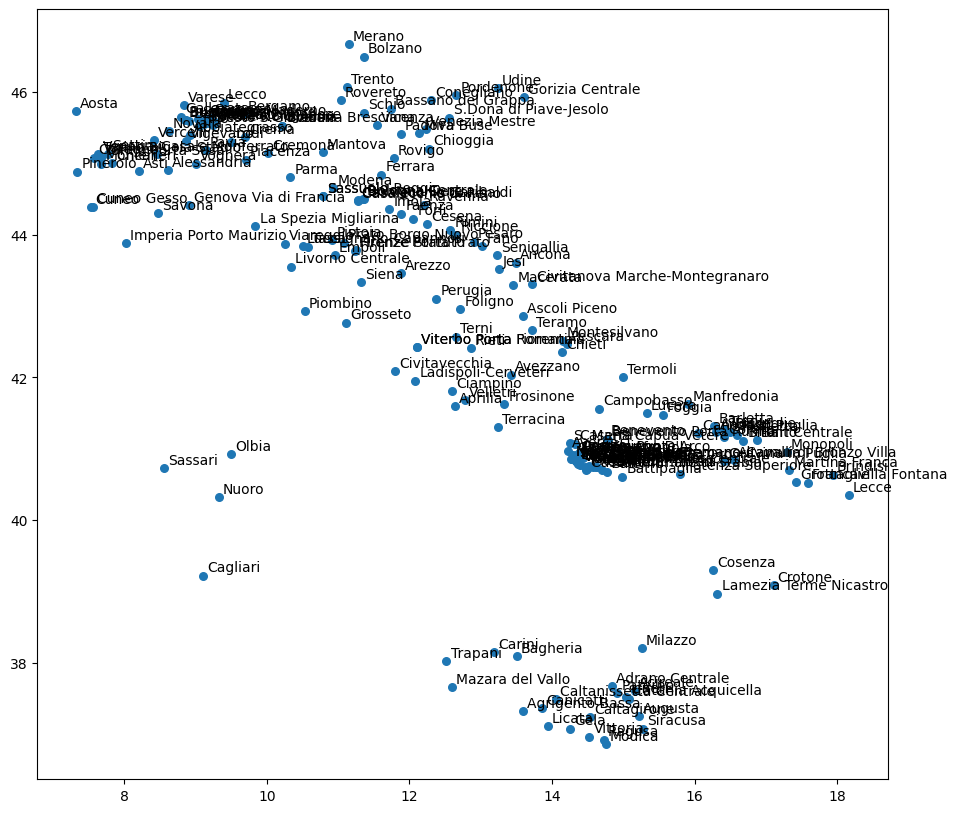

In [6]:
gdf = stations[stations["Country Name"] == "Italy"]
print("number of rail stations in Italy= ", len(gdf))

fig, ax = plt.subplots(1,1, figsize = (20, 10))
gdf.plot(ax=ax, markersize=30)

# Annotate points with TFC labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['NAMA1']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", rotation = 0)

Many stations are indeed missing! Trieste, Petacciato Marina, Roma....
Let's check if in the directory "Italy" of the dataset, there are more rail stations.

In [7]:
ita_stations = gpd.read_file("ITA/RailrdC.shp")
print(ita_stations.head())
print("number of Ita stations =", len(ita_stations))

   FCsubtype                                          inspireId beginLifes  \
0          1  _EG.EGM.RailrdC:4fecaed8-7827-40a6-b0f5-1f9359... 2018-08-02   
1          1  _EG.EGM.RailrdC:ad6ba094-04fc-43be-b0dd-bb74e5... 2018-08-02   
2          1  _EG.EGM.RailrdC:3ce8a91f-21b1-4463-8040-0ed7ec... 2018-08-02   
3          1  _EG.EGM.RailrdC:08e7682f-fe6a-4e2e-ac70-c9b293... 2018-08-02   
4          1  _EG.EGM.RailrdC:23112fc1-667b-44f8-a704-4b3da7... 2018-08-02   

  F_CODE ICC  TFC     NAMN1 NAMN2     NAMA1 NAMA2 NLN1 NLN2  TUC  \
0  AQ125  IT   15    Chieri   N_A    Chieri   N_A  ITA  N_A   26   
1  AQ125  IT   15     Aosta   N_A     Aosta   N_A  ITA  N_A   26   
2  AQ125  IT   15     Schio   N_A     Schio   N_A  ITA  N_A   26   
3  AQ125  IT   15  Pinerolo   N_A  Pinerolo   N_A  ITA  N_A   26   
4  AQ125  IT   15  Piombino   N_A  Piombino   N_A  ITA  N_A   26   

            RStationID                   geometry  
0  N.IT.RAILRDC.001287   POINT (7.82355 45.00625)  
1  N.IT.RAILRDC.00

Nope. They are just the same. Then, I don't need to use the separate files for each country.

## Store stations data in .csv file

In [8]:
#SORT DATAFRAME FOR COUNTRY NAME AND RAIL STATION NAME in alphabetic order
stations = stations.sort_values(by=['ICC', 'NAMA1'])
stations = stations.reset_index(drop=True)
# Extract latitude and longitude
stations['lat'] = stations.geometry.y
stations['lon'] = stations.geometry.x
# Drop useless columns RStationID, TFC, TUC, geometry
stations = stations.drop(columns= ['geometry', 'RStationID', 'TFC', 'TUC'])
# Rename columns in (nodeID,nodeLabel,latitude,longitude,country_name,country_ISO3)
stations = stations.rename(columns={'ICC': 'country_IS03', 'NAMA1' : 'node_label', 'lat': 'latitude', 'lon': 'longitude', 'Country Name': 'country_name'})
# Change column order
stations = stations[['node_label', 'latitude', 'longitude', 'country_name', 'country_IS03']]
# Display the sorted GeoDataFrame
print(stations[stations["country_name"] == "Italy"])

                    node_label   latitude  longitude country_name country_IS03
5225             Abbiategrasso  45.397501   8.920662        Italy           IT
5226                    Acerra  40.939775  14.373019        Italy           IT
5227                  Acireale  37.603678  15.165981        Italy           IT
5228           Adrano Centrale  37.668727  14.837694        Italy           IT
5229           Agrigento Bassa  37.319333  13.589337        Italy           IT
...                        ...        ...        ...          ...          ...
5426                  Vigevano  45.312699   8.862054        Italy           IT
5427  Viterbo Porta Fiorentina  42.425514  12.106242        Italy           IT
5428      Viterbo Porta Romana  42.424073  12.108460        Italy           IT
5429                  Vittoria  36.958856  14.525057        Italy           IT
5430                   Voghera  44.997918   9.008798        Italy           IT

[206 rows x 5 columns]


In [9]:
# .csv file for the whole Europe
# node_ID index must start at 1
index_list = np.arange(1, len(stations)+1)
stations.insert(0, 'node_ID', index_list)
print(stations.tail())
stations.to_csv("whole_EU_stations.csv", index = False )

      node_ID          node_label   latitude  longitude country_name  \
9112     9113           Zhestybud  48.625066  35.210519      Ukraine   
9113     9114            Zhytomyr  50.267884  28.699236      Ukraine   
9114     9115  Zup. punkt 1256 km  47.146505  37.589869      Ukraine   
9115     9116      Zup.p. 1261 km  47.115644  37.592049      Ukraine   
9116     9117         Zustrichnyi  48.400425  35.020698      Ukraine   

     country_IS03  
9112           UA  
9113           UA  
9114           UA  
9115           UA  
9116           UA  


In [10]:
# create separate .csv files for each european country
# node index must start at 1

# Create a list of all keys (first elements)
keys_list = sorted(list(ICC_labels.keys()))
# Find the index of 'IT'
start_index = keys_list.index('IT')
# Create the sublist from 'IT' onwards
keys_sublist = keys_list[start_index:]
stations = stations.drop( columns= ['node_ID'])
for country_code in keys_sublist:
    subdataframe = stations[stations["country_IS03"] == country_code].copy()
    index_list = np.arange(1, len(subdataframe) + 1)
    subdataframe.insert(0, 'node_ID', index_list)
    path = f"{country_code}_nodes.csv"
    subdataframe.to_csv(path, index = False)